In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
celciusvalues = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
farenheitvalues = np.array([32, 33.8, 35.6, 37.4, 39.2, 41, 42.8, 44.6, 46.4, 48.2])

We are going to train a linear regression model to predict farenheit value for a new celcius value<br/>
We want to predict farenheit value (y) for the given celcius value (x)<br/>
Y is called dependent variable because it depends on x<br/>
X is called independent variable <br/>

In [3]:
temperature = pd.DataFrame({
    'Celcius': celciusvalues,
    'Farenheit': farenheitvalues
})

temperature

Celcius  Farenheit
0        0       32.0
1        1       33.8
2        2       35.6
3        3       37.4
4        4       39.2
5        5       41.0
6        6       42.8
7        7       44.6
8        8       46.4
9        9       48.2

We are going to plot a straight line based on the data given<br/>
To plot a line we know y = mx + c<br/>

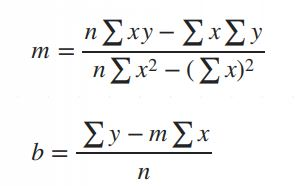

In [4]:
n = temperature.shape[0]
n

10

In [5]:
# I am making a copy of my original dataframe
calculation = temperature.copy()
calculation.columns = ['x', 'Y']
calculation

x     Y
0  0  32.0
1  1  33.8
2  2  35.6
3  3  37.4
4  4  39.2
5  5  41.0
6  6  42.8
7  7  44.6
8  8  46.4
9  9  48.2

In [6]:
calculation.corr()

x    Y
x  1.0  1.0
Y  1.0  1.0

In [7]:
calculation['xy'] = calculation['x'] * calculation['Y']
calculation


x     Y     xy
0  0  32.0    0.0
1  1  33.8   33.8
2  2  35.6   71.2
3  3  37.4  112.2
4  4  39.2  156.8
5  5  41.0  205.0
6  6  42.8  256.8
7  7  44.6  312.2
8  8  46.4  371.2
9  9  48.2  433.8

In [8]:
calculation['x2'] = calculation['x'] * calculation['x']
calculation

x     Y     xy  x2
0  0  32.0    0.0   0
1  1  33.8   33.8   1
2  2  35.6   71.2   4
3  3  37.4  112.2   9
4  4  39.2  156.8  16
5  5  41.0  205.0  25
6  6  42.8  256.8  36
7  7  44.6  312.2  49
8  8  46.4  371.2  64
9  9  48.2  433.8  81

In [9]:
calculation.drop(10, axis=0, inplace=True, errors='ignore')
calculation.loc[10] = calculation.sum()
calculation

x      Y      xy     x2
0    0.0   32.0     0.0    0.0
1    1.0   33.8    33.8    1.0
2    2.0   35.6    71.2    4.0
3    3.0   37.4   112.2    9.0
4    4.0   39.2   156.8   16.0
5    5.0   41.0   205.0   25.0
6    6.0   42.8   256.8   36.0
7    7.0   44.6   312.2   49.0
8    8.0   46.4   371.2   64.0
9    9.0   48.2   433.8   81.0
10  45.0  401.0  1953.0  285.0

In [10]:
numerator = (n * calculation.loc[10, 'xy']) - (calculation.loc[10, 'x'] * calculation.loc[10, 'Y'])
numerator

np.float64(1485.0)

In [11]:
denominator = (n * calculation.loc[10, 'x2']) - (calculation.loc[10, 'x'] * calculation.loc[10, 'x'])
denominator

np.float64(825.0)

In [12]:
slope = numerator / denominator
slope

np.float64(1.8)

In [13]:
intercept = (calculation.loc[10, 'Y']/n) - (slope * calculation.loc[10, 'x']/n)
intercept

np.float64(32.0)

In [14]:
newcelcius = 35
# y = mx + c
farenheitvalue = (slope * newcelcius) + intercept
farenheitvalue

np.float64(95.0)

In [15]:
predicted_farenheitvalues = celciusvalues * slope + intercept
print(predicted_farenheitvalues)
print(farenheitvalues)

[32.  33.8 35.6 37.4 39.2 41.  42.8 44.6 46.4 48.2]
[32.  33.8 35.6 37.4 39.2 41.  42.8 44.6 46.4 48.2]


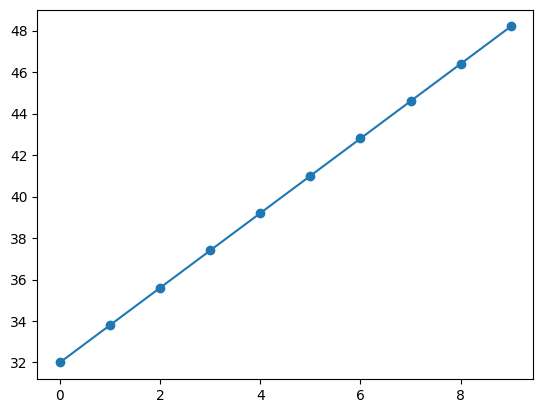

In [16]:
plt.scatter(celciusvalues, farenheitvalues)
plt.plot(celciusvalues, predicted_farenheitvalues)
plt.show()

In [17]:
residuals = farenheitvalues - predicted_farenheitvalues
residuals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
# There is a high chance for the residual value to be positive value as well as negative value
# When we sum all the residuals it can offset and become zero
# Mean Absolute Error (MAE)
abs_residuals = np.abs(residuals)
mean_absolute_error = np.mean(abs_residuals)
mean_absolute_error

np.float64(0.0)

In [19]:
# Mean Squared Error (MSE)
squared_residuals = residuals * residuals
mean_squared_error = np.mean(squared_residuals)
mean_squared_error

np.float64(0.0)

In [20]:
# Root Mean Squared Error (RMSE)
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

np.float64(0.0)

In [21]:
df = pd.read_csv('genderheightweightshoe.csv')
df

Person  height(in feet)  weight(in lbs)  foot size(in inches)
0    male             6.00             180                    12
1    male             5.92             190                    11
2    male             5.58             170                    12
3    male             5.92             165                    10
4  female             5.00             100                     6
5  female             5.50             150                     8
6  female             5.42             130                     7
7  female             5.75             150                     9

In [22]:
human_height = df['height(in feet)'].to_numpy()
human_height

array([6.  , 5.92, 5.58, 5.92, 5.  , 5.5 , 5.42, 5.75])

In [23]:
human_weight = df['weight(in lbs)'].to_numpy()
human_weight

array([180, 190, 170, 165, 100, 150, 130, 150])

In [24]:
human = pd.DataFrame({
    'x': human_height,
    'Y': human_weight
})
human

x    Y
0  6.00  180
1  5.92  190
2  5.58  170
3  5.92  165
4  5.00  100
5  5.50  150
6  5.42  130
7  5.75  150

In [25]:
human['xy'] = human['x'] * human['Y']
human['x2'] = human['x'] * human['x']
human.drop(8, axis=0, inplace=True, errors='ignore')
human.loc[8] = human.sum()
human

x       Y      xy        x2
0   6.00   180.0  1080.0   36.0000
1   5.92   190.0  1124.8   35.0464
2   5.58   170.0   948.6   31.1364
3   5.92   165.0   976.8   35.0464
4   5.00   100.0   500.0   25.0000
5   5.50   150.0   825.0   30.2500
6   5.42   130.0   704.6   29.3764
7   5.75   150.0   862.5   33.0625
8  45.09  1235.0  7022.3  254.9181

In [26]:
numerator = (8 * human.loc[8, 'xy'] - human.loc[8, 'x'] * human.loc[8, 'Y'])
denominator = (8 * human.loc[8, 'x2']) - (human.loc[8, 'x'] * human.loc[8, 'x'])
slope = numerator / denominator
slope

np.float64(78.92795869611315)

In [27]:
intercept = (human.loc[8, 'Y']/8) - (slope * (human.loc[8, 'x']/8))
intercept

np.float64(-290.4827072009678)

In [28]:
predicted_human_weight = human_height * slope + intercept
predicted_human_weight = predicted_human_weight.astype('int16')
# print(predicted_human_weight)
# print(human_weight)
predicted_human_weight

array([183, 176, 149, 176, 104, 143, 137, 163], dtype=int16)

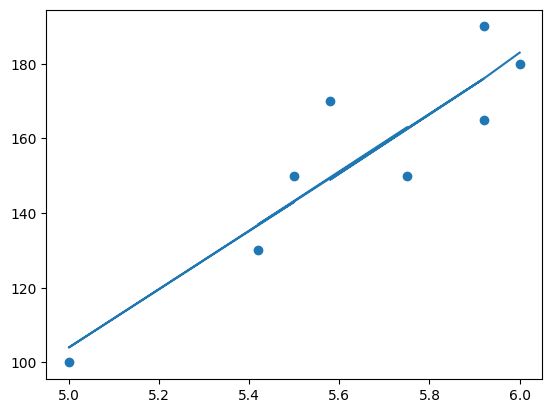

In [29]:
plt.scatter(human_height, human_weight)
plt.plot(human_height, predicted_human_weight)
plt.show()

In [30]:
residuals = human_weight - predicted_human_weight
abs_residuals = np.abs(residuals)
mean_absolute_error = np.mean(abs_residuals)
mean_absolute_error

np.float64(10.0)

In [31]:
squared_residuals = residuals * residuals
mean_squared_error = np.mean(squared_residuals)
mean_squared_error

np.float64(131.25)

In [32]:
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

np.float64(11.4564392373896)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [34]:
model = LinearRegression() # creating an instance of the Linear Regression Class
model.fit(human_height.reshape(-1, 1), human_weight.reshape(-1, 1)) # training
print(model.coef_[0])
print(model.intercept_)

[78.9279587]
[-290.4827072]


In [ ]:
m = 0
c = 0
learning_rate = 0.01
for index in range(100000):
    predicted_human_weight = human_height * m + c
    derivative_m = -(2 / n) * sum(human_height * (human_weight - predicted_human_weight))
    derivative_c = -(2 / n) * sum(human_weight - predicted_human_weight)
    m = m - learning_rate * derivative_m
    c = c - learning_rate * derivative_c

    print(m," ", c) #last value will be the best fit line

14.0446   2.47
20.706009905480002   3.633937972
23.86622797179276   4.178526991171814
25.36614143025636   4.429414120816793
26.07871970937663   4.541024860703206
26.41793472994473   4.58658951954037
26.58009663250953   4.600834733281308
26.658297893510767   4.600228263229098
26.696684012237235   4.592579306980631
26.716189280933936   4.581591073845387
26.72674097642247   4.569019667309239
26.733046725021   4.555697851378513
26.737338936076537   4.542020532094063
26.74067624321099   4.528174978325176
26.74356066239666   4.514249995059206
26.746230255256425   4.500287694603328
26.748797913292133   4.486308047070651
26.751317170926512   4.472320522496836
26.753813414787825   4.458329611662734
26.756298683503633   4.444337444130564
26.758778685929446   4.4303450297461175
26.76125612927168   4.416352847373062
26.763732297320995   4.402361124077373
26.76620779886829   4.388369967519728
26.768682922611987   4.37437942873747
26.77115780545905   4.360389531916521
26.773632512335237   4.34640028